In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))


In [13]:
df = df[df['job_title_short'] == 'Data Analyst']

dfe = df.explode('job_skills')
skill_stats = dfe.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary =('salary_year_avg', 'median')
)
skill_stats = skill_stats.sort_values('skill_count', ascending=False).head(10)


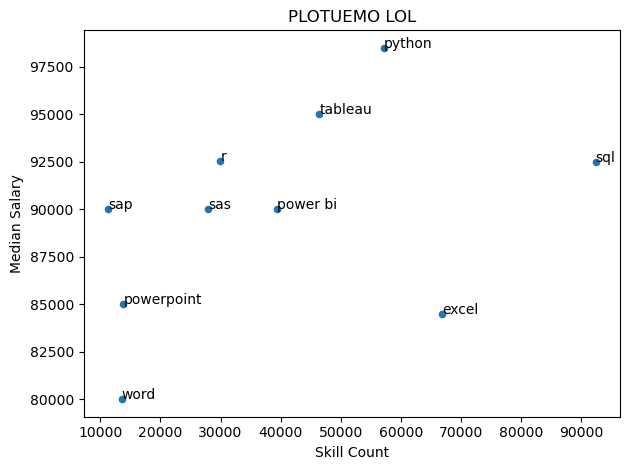

In [23]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

plt.xlabel('Skill Count')
plt.ylabel('Median Salary')
plt.title('PLOTUEMO LOL')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)



plt.tight_layout()
plt.show()